In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit

[0.0949 0.2711 0.2642 0.3142 0.3342]
1.82


,Response time [h],m(product) [g],Turnover u
0,0.5,0.0949,0.052143
1,1.0,0.2711,0.148956
2,1.5,0.2642,0.145165
3,2.0,0.3142,0.172637
4,2.5,0.3342,0.183626


\begin{tabular}{lrrr}
\toprule
 & Response time [h] & m(product) [g] & Turnover u \\
\midrule
1 & 0.500000 & 0.094900 & 0.052143 \\
2 & 1.000000 & 0.271100 & 0.148956 \\
3 & 1.500000 & 0.264200 & 0.145165 \\
4 & 2.000000 & 0.314200 & 0.172637 \\
5 & 2.500000 & 0.334200 & 0.183626 \\
\bottomrule
\end{tabular}



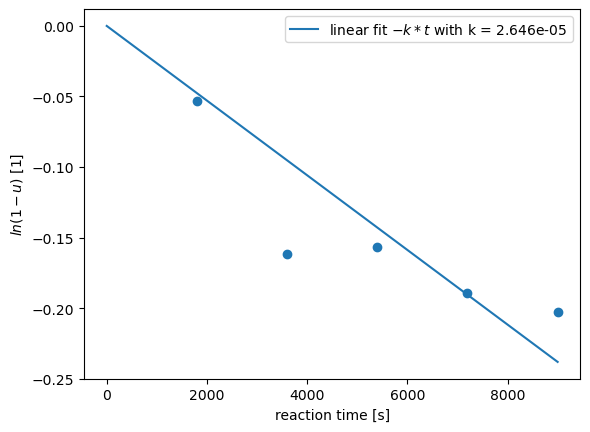

In [123]:
# Reaktionsdauer

def zeitvariation():
    m_leer = np.array([
        13.3250,
        13.6464,
        13.8632,
        13.8291,
        13.8238
    ])

    m_voll = np.array([
        13.4199,
        13.9175,
        14.1274,
        14.1433,
        14.1580
    ])

    m_proben = m_voll-m_leer
    print(m_proben)



    V_mono = 10
    V_lose = 50
    m_ini = 50

    V_probe = 10

    dichte_mono = 0.91
    M_mono = 104.15
    M_ini = 64.21 
    print(dichte_mono*2)
    m_mono = 2 *dichte_mono

    umsatz = m_proben/m_mono

    reaktionszeiten = np.array([
        .5,1,1.5,2,2.5
    ]) * 60*60


    def lin_no_c(x,m):
        return -x*m

    tabelle_1 = pd.DataFrame({"Response time [h]":reaktionszeiten/3600, "m(product) [g]":m_proben,"Turnover u":umsatz})
    display(tabelle_1)
    fig,ax = plt.subplots()
    ax.scatter(reaktionszeiten,np.log(1-umsatz))
    tabelle_1
    k, _ = curve_fit(lin_no_c,reaktionszeiten,np.log(1-umsatz))
    ax.plot(np.linspace(0,reaktionszeiten[-1]), lin_no_c(np.linspace(0,reaktionszeiten[-1]),k),label=f"linear fit $-k*t$ with k = {np.format_float_scientific(k[0],3)}")
    ax.set_xlabel("reaction time [s]")
    ax.set_ylabel("$ln(1-u)$ [1]")
    ax.legend()
    tabelle_1.index+=1
    print(tabelle_1.to_latex())
    fig.savefig("2.1_ln_umsatz_zeit.pdf")
zeitvariation()


/tmp/ipykernel_1752866/2949975554.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  opt, _ = curve_fit(sq,[c_ini[0],c_ini[2],c_ini[4]],M_poly,p0=[1, 1])


\begin{tabular}{lrrrr}
\toprule
 & m(AIBN) [mg] & m(product) [g] & Turnover U [%] & c(AIBN) [mmol/L \\
\midrule
1 & 32.000000 & 0.484000 & 0.265934 & 16.239368 \\
2 & 16.000000 & 0.346900 & 0.190604 & 8.119684 \\
3 & 8.000000 & 0.260200 & 0.142967 & 4.059842 \\
4 & 4.000000 & 0.144600 & 0.079451 & 2.029921 \\
5 & 2.000000 & 0.091600 & 0.050330 & 1.014961 \\
\bottomrule
\end{tabular}



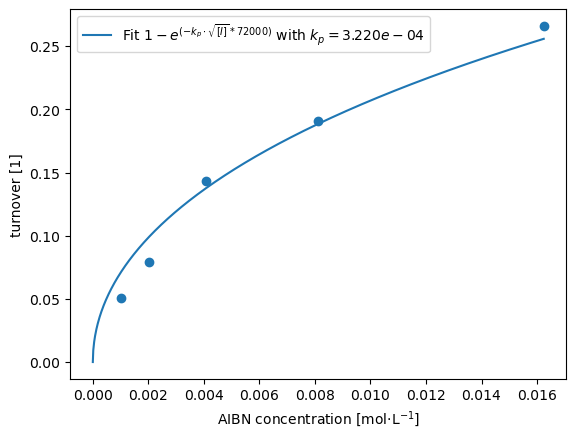

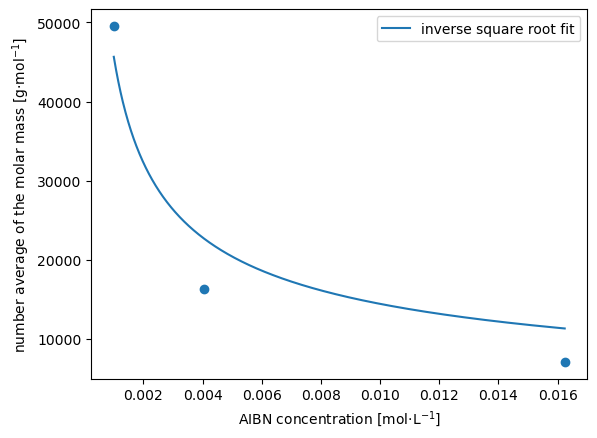

In [127]:
# 2.2
m_proben = np.array([
    0.4840,
    0.3469,
    0.2602,
    0.1446,
    0.0916
])
dichte_mono = 0.91
V_mono = 10
M_mono = 104.15

umsatz = m_proben/(1/5*V_mono*dichte_mono)
m_ini = np.array([
    32, 16, 8, 4,2
])*1e-3
M_ini = 164.21
V_probe = 12e-3
c_ini = m_ini/(V_probe*M_ini)

fig,ax = plt.subplots()
ax.scatter(c_ini,umsatz)
def umsatzurve(i,k):
    return 1-np.exp(-k*np.sqrt(i)*2*60*60)
opt, _ = curve_fit(umsatzurve,c_ini,umsatz,p0=[2.31861909/(20*60*60)])
xs = np.linspace(0,c_ini[0],1000)
ax.plot(xs,umsatzurve(xs,*opt),label=f"Fit $1-e^{{(-k_p\cdot \sqrt{{[I]}}*{20*60*60})}}$ with $k_p={np.format_float_scientific(opt[0],3)}$")
ax.legend()
ax.set_xlabel("AIBN concentration [mol$\cdot$L$^{-1}$]")
ax.set_ylabel("turnover [1]")
fig.savefig("2.2.umsatz_ci.pdf")
M_poly = np.array([
    7.0860e3
    ,1.6323e4
    ,4.9535e4 
])
fig, ax = plt.subplots()
ax.scatter([c_ini[0],c_ini[2],c_ini[4]],M_poly)
def negexp(x,a,b):
    return 1- a*np.exp(-b*x) + M_mono

def sq(x,a,b):
    return b/(np.sqrt(x))
opt, _ = curve_fit(sq,[c_ini[0],c_ini[2],c_ini[4]],M_poly,p0=[1, 1])
ax.plot(np.linspace(0.001,c_ini[0],1000), sq(np.linspace(0.001,c_ini[0],1000),*opt),label="inverse square root fit")
ax.set_xlabel("AIBN concentration [mol$\cdot$L$^{-1}$]")
ax.set_ylabel("number average of the molar mass [g$\cdot$mol$^{-1}$]")
ax.legend()
fig.savefig("2.2.molaremasse.pdf")
c_ini
opt

tabelle_2 = pd.DataFrame({"m(AIBN) [mg]": m_ini*1e3,"m(product) [g]": m_proben, "Turnover U [%]": umsatz, "c(AIBN) [mmol/L":c_ini*1e3})
tabelle_2.index +=1
print(tabelle_2.to_latex())

/tmp/ipykernel_1752866/635913218.py:89: RuntimeWarning: divide by zero encountered in reciprocal
  tabelle_3 = pd.DataFrame({"m(fluorene) [g]": m_fluoren,"m(product) [g]":m_proben, "Turnover U[%]":umsatz, "Degree of polymerization Xn":polymerisationsgrad, "Reciprocal degree of polymerization 1/ Xn":polymerisationsgrad**-1,})


\begin{tabular}{lrrrrr}
\toprule
 & m(fluorene) [g] & m(product) [g] & Turnover U[%] & Degree of polymerization Xn & Reciprocal degree of polymerization 1/ Xn \\
\midrule
1 & 1.999900 & 0.189300 & 0.104011 & 0.000000 & inf \\
2 & 1.000900 & 0.220400 & 0.121099 & 0.000000 & inf \\
3 & 0.499800 & 0.259300 & 0.142473 & 101.219395 & 0.009880 \\
4 & 0.250500 & 0.178700 & 0.098187 & 96.793087 & 0.010331 \\
5 & 0.124900 & 0.300900 & 0.165330 & 127.642823 & 0.007834 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
 & m(fluorene) [g] & [fluorene] [mol/L] & c(styrene) [mol/L] & dilution ratio \\
\midrule
1 & 1.999900 & 1.002577 & 1.456233 & 0.688473 \\
2 & 1.000900 & 0.501765 & 1.456233 & 0.344563 \\
3 & 0.499800 & 0.250556 & 1.456233 & 0.172058 \\
4 & 0.250500 & 0.125579 & 1.456233 & 0.086236 \\
5 & 0.124900 & 0.062614 & 1.456233 & 0.042997 \\
\bottomrule
\end{tabular}



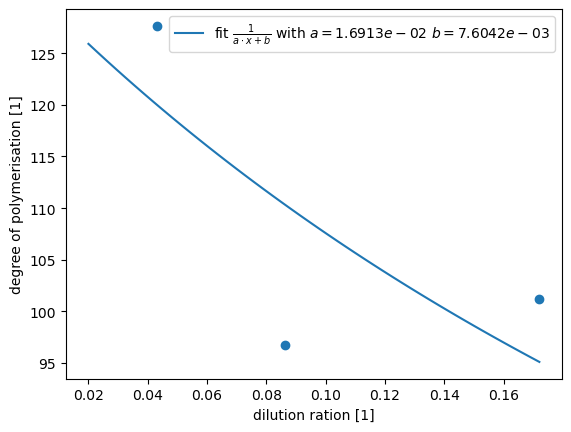

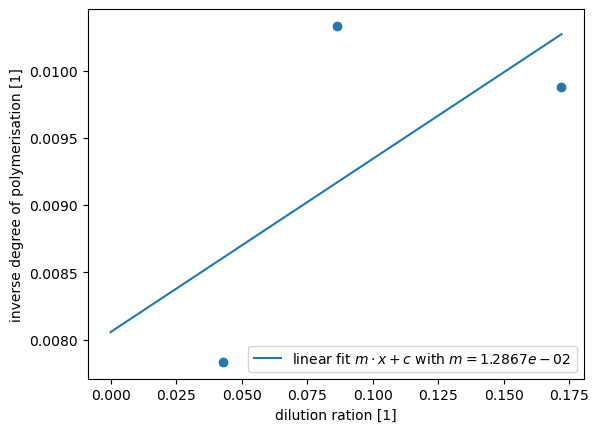

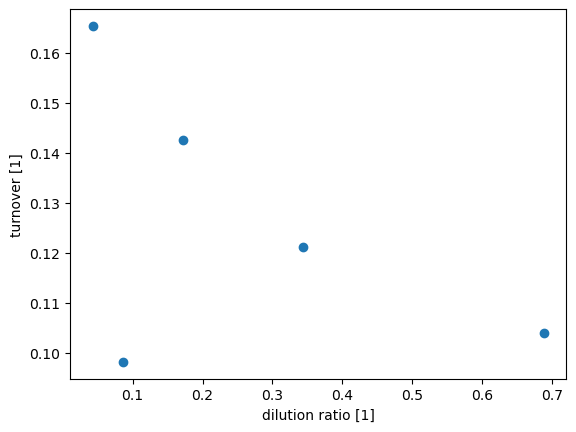

In [131]:
m_leer = np.array([
       13.8260,
       13.3484,
       13.8639,
       13.8248,
       13.3530
    ])
m_voll = np.array([
    14.0153,
    13.5688,
    14.1232,
    14.0035,
    13.6539
])

m_proben = m_voll-m_leer
m_proben
dichte_mono = 0.91
M_mono = 104.15


m_fluoren = np.array([
    1.9999,
    1.0009,
   0.4998,
    0.2505,
    0.1249
])




V_mono = 10
V_lose = 55
m_ini = 55

V_probe = 10

dichte_mono = 0.91
M_mono = 104.15
M_ini = 64.21 

m_mono = 2 *dichte_mono

umsatz = m_proben/m_mono

reaktionszeiten = 2
M_fluoren = 166.23
verdun = m_fluoren/M_fluoren/(m_mono/M_mono)




#ax.scatter(verdun,umsatz)
M_poly = np.array([
    0,
    0,
    1.0542e4,
    1.0081e4,
    1.3294e4
])
polymerisationsgrad = M_poly/M_mono
fig,ax = plt.subplots()
ax.scatter(verdun[2:],polymerisationsgrad[2:])
def mayo(x,a,b):
    return   1/(a*x+b)
ax.set_xlabel("dilution ration [1]")
ax.set_ylabel("degree of polymerisation [1]")
a,b = curve_fit(mayo,verdun[2:],polymerisationsgrad[2:],p0=[2e-3,1])[0]
ax.plot(np.linspace(0.02,verdun[2]),mayo(np.linspace(0.02,verdun[2]),a,b),label=rf"fit $\frac{{1}}{{a\cdot x + b}}$ with $a={np.format_float_scientific(a,4)}$ $b={np.format_float_scientific(b,4)}$")
#print(a,b)
ax.legend()
fig.savefig("2.3.poly.pdf")
fig,ax = plt.subplots()
ax.scatter(verdun[2:],polymerisationsgrad[2:]**-1)
l = linregress(verdun[2:],polymerisationsgrad[2:]**-1)
ax.plot(np.linspace(0,verdun[2]),l.slope * np.linspace(0,verdun[2])+l.intercept, label=f"linear fit $m\cdot x +c$ with $m={np.format_float_scientific(l.slope,4)}$")
ax.set_xlabel("dilution ration [1]")
ax.set_ylabel("inverse degree of polymerisation [1]")
#print(l.slope,b)
ax.legend()
fig.savefig("2.3.poly_inverse.pdf")

fig,ax = plt.subplots()
ax.scatter(verdun,umsatz)
ax.set_xlabel("dilution ratio [1]")
ax.set_ylabel("turnover [1]")
fig.savefig("2.3.ums.pdf")
tabelle_3 = pd.DataFrame({"m(fluorene) [g]": m_fluoren,"m(product) [g]":m_proben, "Turnover U[%]":umsatz, "Degree of polymerization Xn":polymerisationsgrad, "Reciprocal degree of polymerization 1/ Xn":polymerisationsgrad**-1,})
tabelle_3.index +=1
print(tabelle_3.to_latex())

tabelle_3_2 = pd.DataFrame({ "m(fluorene) [g]": m_fluoren,"[fluorene] [mol/L]":m_fluoren/M_fluoren/12e-3, "c(styrene) [mol/L]":2*dichte_mono/M_mono/12e-3, "dilution ratio": verdun,})
tabelle_3_2.index +=1
print(tabelle_3_2.to_latex())